In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal

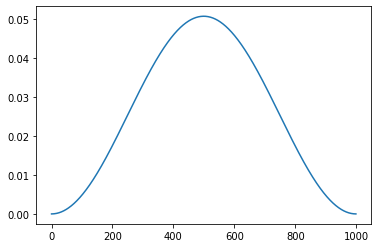

In [2]:
def real_u(x):
    return  (1/ (2* np.pi**2))*((np.sin(np.pi * x))**2)

plt.plot(real_u(np.linspace(0, 1, 1000)))

In [3]:
def Wendland_kern(x1, x2, epsilon = 0.001): #kernel, use Wendland covariance as an example 
        return np.max(1 - np.abs(x1 - x2)/epsilon, 0)**4 * (4*np.abs(x1 - x2)/epsilon + 1)

def gauss_kernel(x1, x2, L=0.25):
    return np.exp(- (x1-x2)**2 / (2* L**2))

def gauss_kernel_derix(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (-(x1 - x2) / L**2)

def gauss_kernel_deriy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * ((x1 - x2) / L**2)

def gauss_kernel_derixy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * (-(x1-x2)**2  + L**2)

def gauss_kernel_derixx(x1, x2, L=0.25): #This is A operator 
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**4) * ((x1-x2)**2  - L**2)

def gauss_kernel_deriyy(x1, x2, L=0.25): #This is A_hat operator 
    return gauss_kernel_derixx(x1, x2, L) 

#AA_hat operator
def gauss_kernel_derixxyy(x1, x2, L=0.25):
    return np.exp(-(x1-x2)**2 / (2* L**2)) * (1/ L**8) *(3* (L**4) - 6* (L**2)*((x1-x2)**2) + (x1-x2)**4)


def Gram(X, Y, kern):  #X, T are both list 
        output = np.zeros((len(X), len(Y)))
        for i in range(len(X)):
            for j in range(len(Y)):
                output[i-1][j-1] = kern(X[i], Y[j]) 

        return output 

g1 =  lambda x: np.cos(2*np.pi*x)
b1 = lambda x: 0

d1, d2 = 0, 1
D = [0, 1]


In [4]:
AA_hat_K = gauss_kernel_derixxyy
AB_hat_K = gauss_kernel_derixx
BA_hat_K = gauss_kernel_deriyy
BB_hat_K = gauss_kernel
AK = gauss_kernel_derixx
BK = gauss_kernel
A_hat_K = gauss_kernel_deriyy
B_hat_K = gauss_kernel 

X_0A, X_0B = [0.1*i for i in range(0, 10)], D # mA = 20
X = [0.001*i for i in range(1000)]

LK = np.vstack((Gram(X_0A, X, AK), Gram(X_0B, X, BK))) #LK 

L_hat_K = np.hstack((Gram(X, X_0A, A_hat_K), Gram(X, X_0B, B_hat_K)))

LL_hat_K = np.vstack((np.hstack((Gram(X_0A, X_0A, AA_hat_K), 
                                Gram(X_0A, X_0B, AB_hat_K))), 
                                np.hstack((Gram(X_0B, X_0A, BA_hat_K), 
                                Gram(X_0B, X_0B, BB_hat_K)))))

def g_matrix(g, X):
        return np.vectorize(g)(X).T

def b_matrix(b, X):
        return np.vectorize(b)(X).T


In [5]:
g_matrix(g1, X_0A), b_matrix(b1, X_0B)

(array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
        -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699]),
 array([0, 0]))

In [6]:
latter = np.hstack((g_matrix(g1, X_0A).T, b_matrix(b1, X_0B).T)).T
middle = np.linalg.inv(LL_hat_K)

mean = np.matmul(np.matmul(L_hat_K, middle), latter)
var = Gram(X, X, gauss_kernel)  - np.matmul(np.matmul(L_hat_K, middle), LK)

mean, var

(array([-9.31882553e-05, -1.85563684e-04, -2.77122512e-04, -3.67861002e-04,
        -4.57775453e-04, -5.46862206e-04, -6.35117634e-04, -7.22538153e-04,
        -8.09120214e-04, -8.94860307e-04, -9.79754959e-04, -1.06380073e-03,
        -1.14699424e-03, -1.22933211e-03, -1.31081104e-03, -1.39142773e-03,
        -1.47117894e-03, -1.55006147e-03, -1.62807215e-03, -1.70520785e-03,
        -1.78146547e-03, -1.85684198e-03, -1.93133434e-03, -2.00493959e-03,
        -2.07765478e-03, -2.14947702e-03, -2.22040344e-03, -2.29043123e-03,
        -2.35955759e-03, -2.42777979e-03, -2.49509511e-03, -2.56150089e-03,
        -2.62699450e-03, -2.69157334e-03, -2.75523486e-03, -2.81797655e-03,
        -2.87979592e-03, -2.94069056e-03, -3.00065804e-03, -3.05969602e-03,
        -3.11780218e-03, -3.17497422e-03, -3.23120992e-03, -3.28650705e-03,
        -3.34086346e-03, -3.39427702e-03, -3.44674564e-03, -3.49826726e-03,
        -3.54883989e-03, -3.59846153e-03, -3.64713027e-03, -3.69484421e-03,
        -3.7

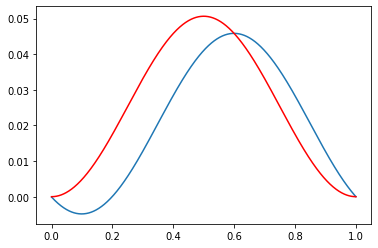

In [7]:
plt.plot(np.linspace(0, 1, 1000),  mean)
plt.plot(np.linspace(0, 1, 1000), real_u(np.linspace(0, 1, 1000)), color = 'r')

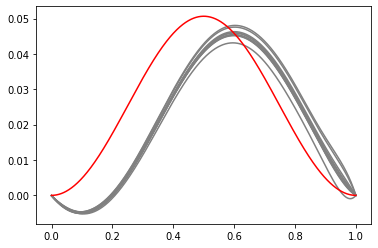

In [11]:
sample = np.random.multivariate_normal(mean, var, size=10)
plt.plot(np.linspace(0, 1, 1000),  sample.T, color = 'grey')
plt.plot(np.linspace(0, 1, 1000), real_u(np.linspace(0, 1, 1000)), color = 'r')
plt.show()

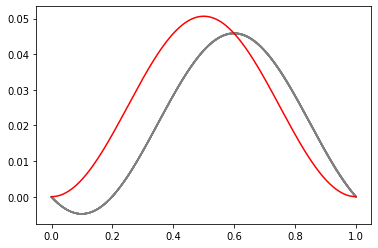

In [12]:
var1 = var/800
sample1 = np.random.multivariate_normal(mean, var1, size=10)

plt.plot(np.linspace(0, 1, 1000),  sample1.T, color = 'grey')
plt.plot(np.linspace(0, 1, 1000), real_u(np.linspace(0, 1, 1000)), color = 'r')
plt.show()

### Baysesian Inverse Problem 

In [10]:
# Direct observation corrupted with noise
y = real_u(np.linspace(0, 1, 1000)) + np.random.normal(0,1,1000)

# likelihood 
# l = multivariate_normal.pdf(y, mean, var)